<a href="https://colab.research.google.com/github/breakdq/mlproject/blob/main/Reconoimiento_Tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Paso 1: Instalar dependencias
!apt-get install tesseract-ocr
!pip install pytesseract pillow opencv-python pandas openpyxl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
# Paso 2: Importar librerías
import pytesseract
from PIL import Image
import cv2
import os
from google.colab import drive
from google.colab.patches import cv2_imshow

In [4]:
# Paso 3: Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Paso 4: Configurar rutas
ruta_carpeta = '/content/drive/MyDrive/tickets'  # Cambia esto por tu ruta
os.chdir(ruta_carpeta)


Procesando: 1.PNG
---------------------------


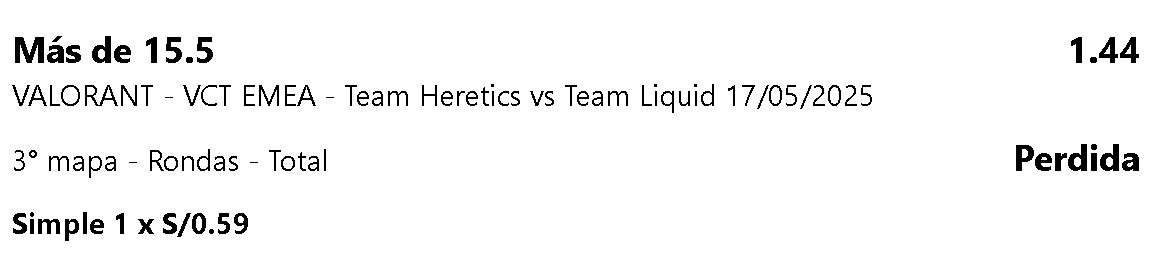


Texto extraído:
--------------
Mas de 15.5 1.44
VALORANT - VCT EMEA - Team Heretics vs Team Liquid 17/05/2025

3° mapa - Rondas - Total Perdida

Simple 1 x $/0.59


Texto guardado en: 1.txt

Procesando: 2.PNG
---------------------------


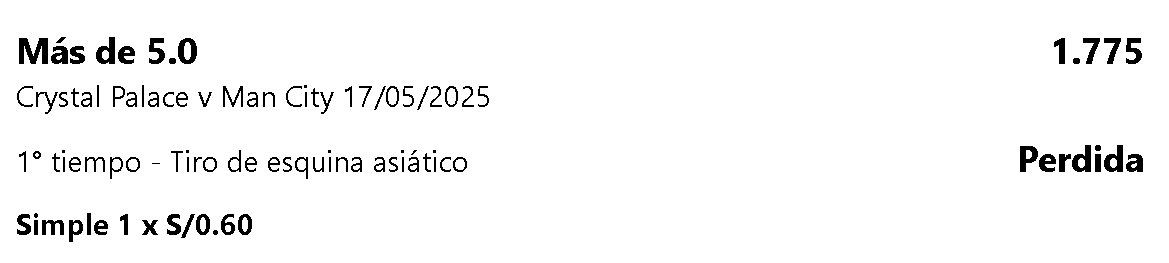


Texto extraído:
--------------
Mas de 5.0 1.775
Crystal Palace v Man City 17/05/2025

1° tiempo - Tiro de esquina asiatico Perdida

Simple 1 x $/0.60


Texto guardado en: 2.txt

Procesando: 3.PNG
---------------------------


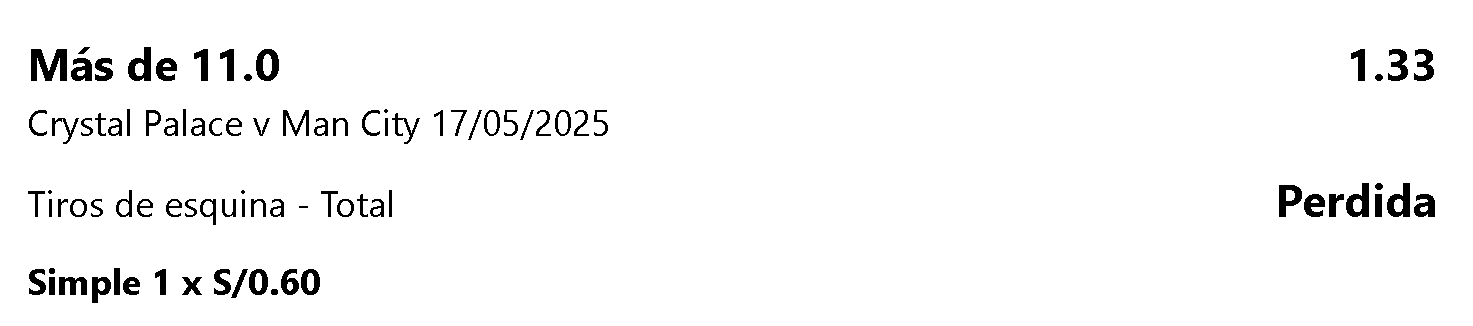


Texto extraído:
--------------
Mas de 11.0 1.33

Crystal Palace v Man City 17/05/2025
Perdida

Tiros de esquina - Total

Simple 1 x S/0.60


Texto guardado en: 3.txt

Procesando: 4.PNG
---------------------------


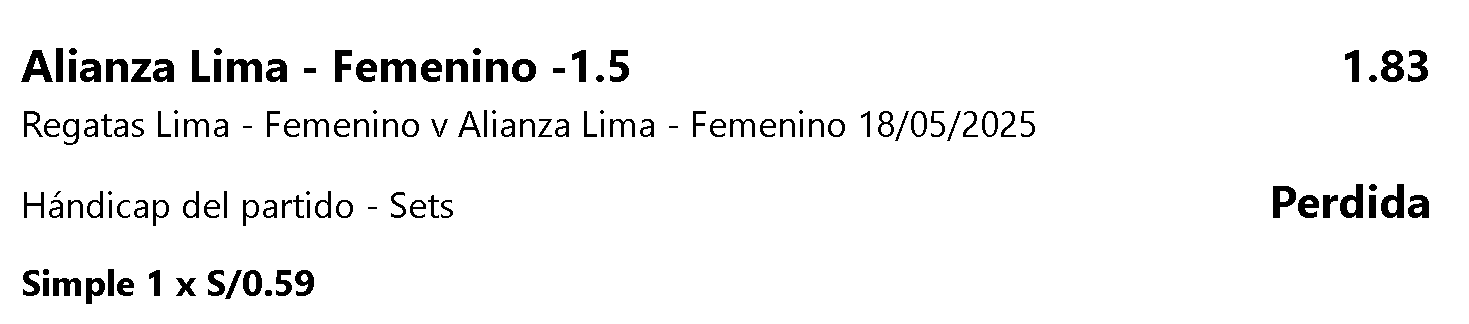


Texto extraído:
--------------
Alianza Lima - Femenino -1.5 1.83

Regatas Lima - Femenino v Alianza Lima - Femenino 18/05/2025
Handicap del partido - Sets Perdida
Simple 1 x S/0.59


Texto guardado en: 4.txt

Procesando: 5.PNG
---------------------------


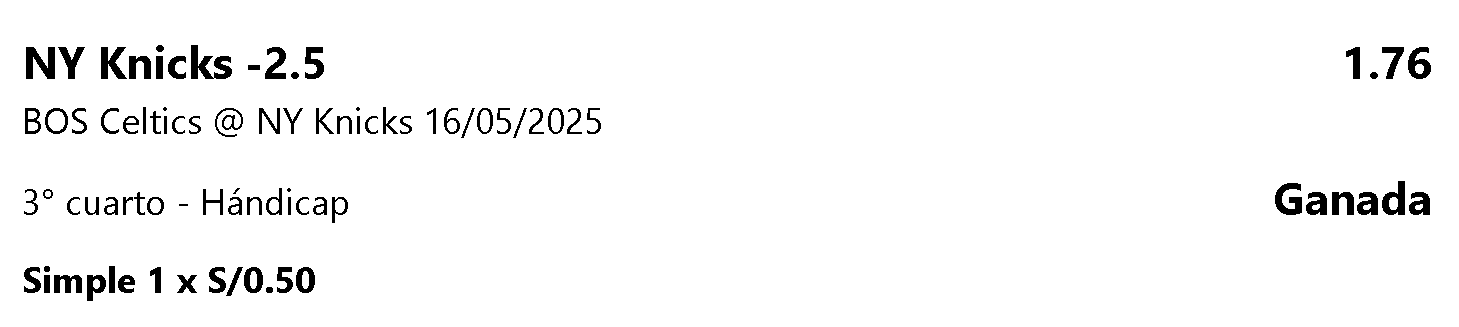


Texto extraído:
--------------
NY Knicks -2.5 1.76
BOS Celtics @ NY Knicks 16/05/2025

3° cuarto - Handicap Ganada

Simple 1 x S/0.50


Texto guardado en: 5.txt

Procesando: 6.PNG
---------------------------


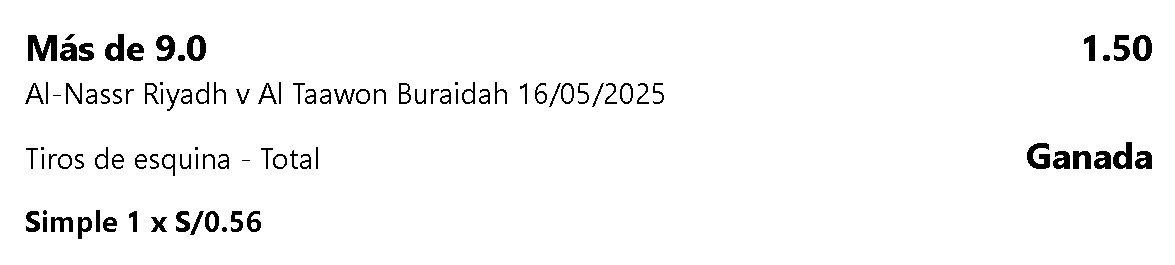


Texto extraído:
--------------
Mas de 9.0 1.50
Al-Nassr Riyadh v Al Taawon Buraidah 16/05/2025

Tiros de esquina - Total Ganada

Simple 1 x $/0.56


Texto guardado en: 6.txt

Procesando: 7.PNG
---------------------------


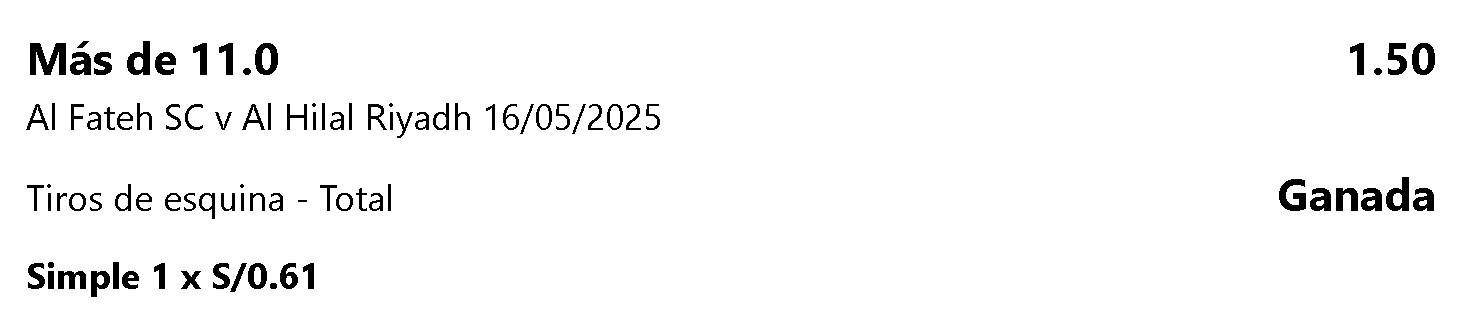


Texto extraído:
--------------
Mas de 11.0 1.50
Al Fateh SC v Al Hilal Riyadh 16/05/2025

Tiros de esquina - Total Ganada

Simple 1 x S/0.61


Texto guardado en: 7.txt

Procesando: 8.PNG
---------------------------


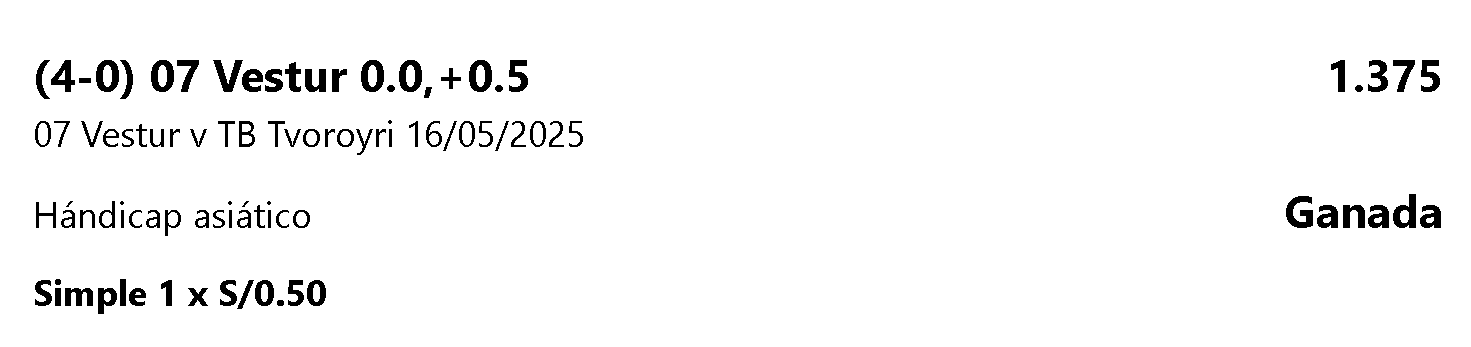


Texto extraído:
--------------
(4-0) 07 Vestur 0.0,+0.5 1.375
07 Vestur v TB Tvoroyri 16/05/2025

Handicap asiatico Ganada

Simple 1 x S/0.50


Texto guardado en: 8.txt

Procesando: 9.PNG
---------------------------


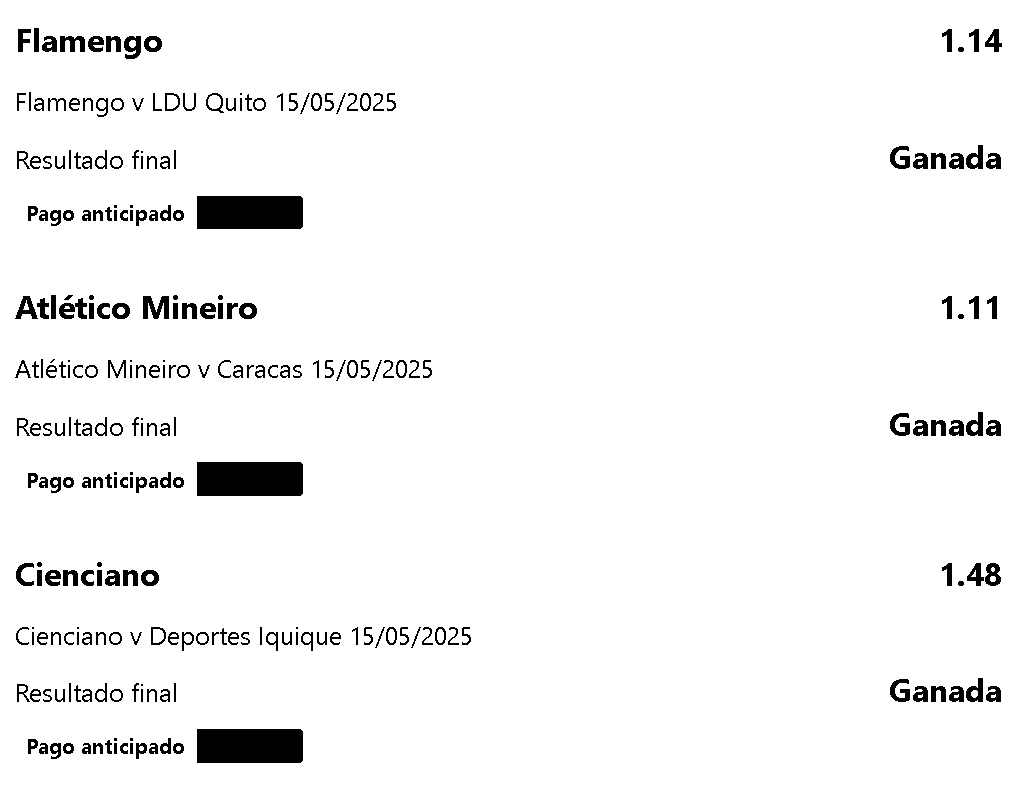


Texto extraído:
--------------
Flamengo
Flamengo v LDU Quito 15/05/2025

Resultado final

Pago anticipado |

Atlético Mineiro
Atlético Mineiro v Caracas 15/05/2025

Resultado final

Pago anticipado |

Cienciano
Cienciano v Deportes Iquique 15/05/2025

Resultado final

Pago anticipado |

1.14

Ganada

1.11

Ganada

1.48

Ganada


Texto guardado en: 9.txt

Proceso completado!


In [6]:

# Paso 5: Procesar todas las imágenes en la carpeta
for nombre_archivo in os.listdir():
    if nombre_archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        try:
            print(f"\nProcesando: {nombre_archivo}")
            print("---------------------------")

            # Leer y procesar imagen
            img = cv2.imread(nombre_archivo)
            if img is None:
                print(f"No se pudo leer la imagen {nombre_archivo}")
                continue

            # Preprocesamiento para mejorar OCR
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

            # Mostrar imagen procesada (opcional)
            cv2_imshow(thresh)

            # Aplicar OCR
            texto = pytesseract.image_to_string(thresh)

            # Mostrar resultados
            print("\nTexto extraído:")
            print("--------------")
            print(texto)

            # Guardar resultados en un archivo .txt
            nombre_salida = os.path.splitext(nombre_archivo)[0] + ".txt"
            with open(nombre_salida, 'w', encoding='utf-8') as f:
                f.write(texto)

            print(f"\nTexto guardado en: {nombre_salida}")

        except Exception as e:
            print(f"Error procesando {nombre_archivo}: {str(e)}")

print("\nProceso completado!")